# Deep Learning Project: Fashion MNIST Classification

This notebook consolidates the data loading, model definition, and training steps for the Fashion MNIST classification project.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import json
import os

print(f"TensorFlow Version: {tf.__version__}")


TensorFlow Version: 2.20.0


## 1. Data Loading and Preprocessing
 We load the Fashion MNIST dataset, normalize pixel values, and one-hot encode the labels.


Loading Fashion MNIST data...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 33s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step
Data loaded. Train shape: (60000, 28, 28, 1), Test shape: (10000, 28, 28, 1)


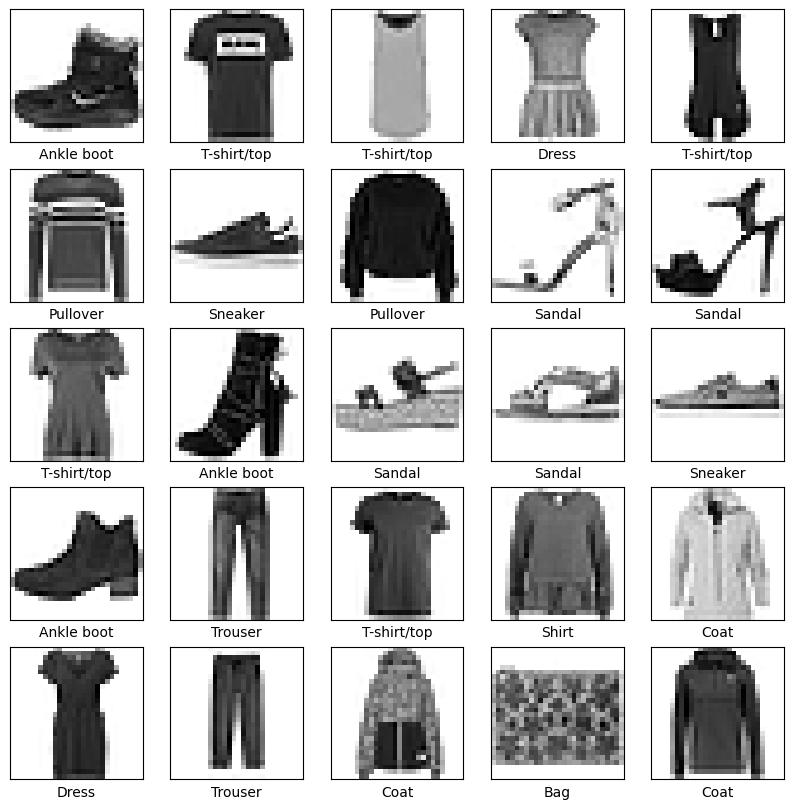

In [2]:
def load_data():
    print("Loading Fashion MNIST data...")
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

    # Class names for Fashion MNIST
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    # Normalize pixel values to be between 0 and 1
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Reshape for CNN input (batch, height, width, channels)
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

    # Convert labels to one-hot encoding
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    print(f"Data loaded. Train shape: {x_train.shape}, Test shape: {x_test.shape}")
    return (x_train, y_train), (x_test, y_test), class_names

def save_sample_images_inline(x_train, y_train, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
        label_index = np.argmax(y_train[i])
        plt.xlabel(class_names[label_index])
    plt.show()

# Load and Visualize
(x_train, y_train), (x_test, y_test), class_names = load_data()
save_sample_images_inline(x_train, y_train, class_names)


## 2. Model Definitions
 We define three models: a Baseline ANN, a Basic CNN, and a Tuned CNN with Regularization.


In [3]:
from tensorflow.keras import layers, models

def build_baseline_ann(input_shape, num_classes):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ], name="Baseline_ANN")
    return model

def build_simple_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ], name="Simple_CNN")
    return model

def build_tuned_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dropout(0.5), # Regularization
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ], name="Tuned_CNN")
    return model


## 3. Training Loop
 Helper function to train and evaluate models.


In [4]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=10):
    print(f"\nTraining {model.name}...")
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.2, verbose=1)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{model.name} - Test accuracy: {test_acc:.4f}")
    
    return history, test_acc, test_loss

def plot_history(histories, metric='accuracy'):
    plt.figure(figsize=(10, 6))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f'{name} Train')
        plt.plot(history.history[f'val_{metric}'], linestyle='--', label=f'{name} Val')
    
    plt.title(f'Model Comparision - {metric.capitalize()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()


## 4. Main Execution
 Train all models and compare results.


c:\Users\wisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\wisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Baseline_ANN...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8206 - loss: 0.5123 - val_accuracy: 0.8512 - val_loss: 0.4062
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8622 - loss: 0.3836 - val_accuracy: 0.8730 - val_loss: 0.3680
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8769 - loss: 0.3442 - val_accuracy: 0.8723 - val_loss: 0.3653
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8830 - loss: 0.3205 - val_accuracy: 0.8783 - val_loss: 0.3415
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8900 - loss: 0.3005 - val_accuracy: 0.8776 - val_loss: 0.3415
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8956 - loss: 0.2840 - val_accuracy: 0.8848 - val_loss: 0.3189
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9005 - loss: 0.2730 - val_accuracy: 0.8798 - val_loss: 0.3315
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy

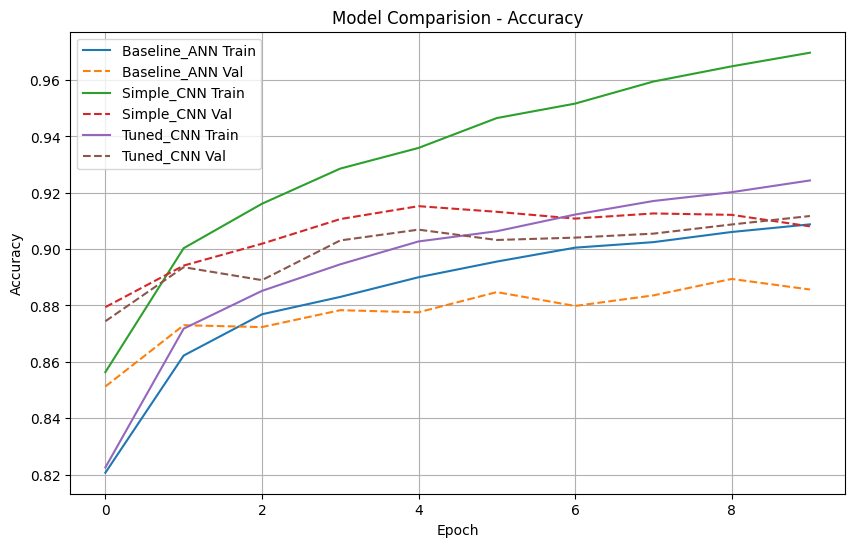

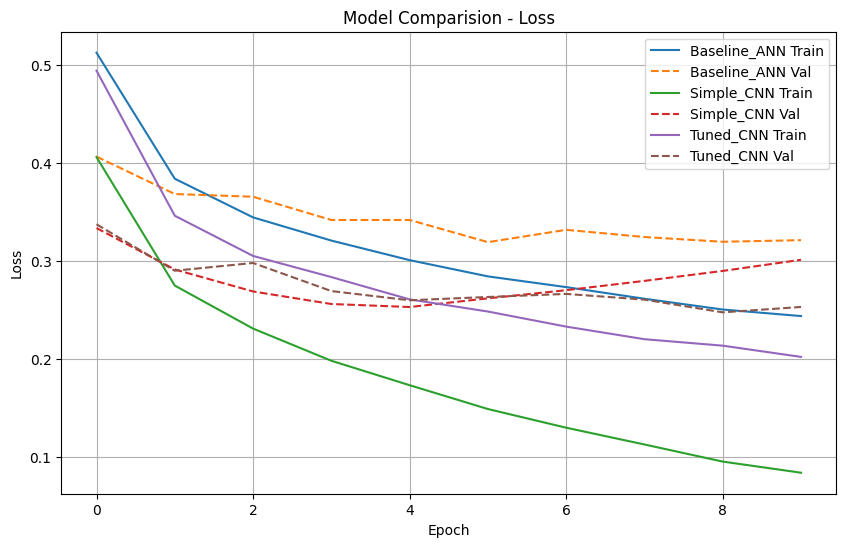

All models trained.
{
  "Baseline_ANN": {
    "test_accuracy": 0.8773999810218811,
    "test_loss": 0.3499082624912262
  },
  "Simple_CNN": {
    "test_accuracy": 0.9054999947547913,
    "test_loss": 0.32401201128959656
  },
  "Tuned_CNN": {
    "test_accuracy": 0.9064000248908997,
    "test_loss": 0.2632191777229309
  }
}


In [5]:
input_shape = x_train.shape[1:]
num_classes = 10
EPOCHS = 10

models_to_train = [
    build_baseline_ann(input_shape, num_classes),
    build_simple_cnn(input_shape, num_classes),
    build_tuned_cnn(input_shape, num_classes)
]

histories = {}
results = {}

for model in models_to_train:
    history, acc, loss = train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=EPOCHS)
    histories[model.name] = history
    results[model.name] = {
        "test_accuracy": float(acc),
        "test_loss": float(loss)
    }

# Visualize Comparison
plot_history(histories, 'accuracy')
plot_history(histories, 'loss')

print("All models trained.")
print(json.dumps(results, indent=2))


# Phase 2: Advanced Deep Learning

In this phase, we aim to improve model performance beyond 92% accuracy and reduce overfitting. We will introduce:
1. **Data Augmentation**: To increase dataset diversity.
2. **Advanced CNN Architecture**: A deeper network with Global Average Pooling.
3. **Smart Training**: Using Callbacks (EarlyStopping, ReduceLROnPlateau).


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,      # Slight rotation
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1, # Vertical shift
    shear_range=0.1,        # Shear transformation
    zoom_range=0.1,         # Zoom in/out
    horizontal_flip=True,   # Horizontal flip (valid for clothes)
    fill_mode='nearest'
)

# Fit the generator to the training data (calculates statistics if needed, though mostly for ZCA whitening)
datagen.fit(x_train)

print("Data Augmentation Generator created.")


Data Augmentation Generator created.


In [7]:
# 2. Advanced CNN Architecture
def build_advanced_cnn(input_shape, num_classes):
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        
        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        
        # Head (Global Average Pooling instead of Flatten)
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ], name="Advanced_CNN")
    return model

advanced_model = build_advanced_cnn(x_train.shape[1:], 10)
advanced_model.summary()


Model: "Advanced_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 158,442 (618.91 KB)

 Trainable params: 157,546 (615.41 KB)

 Non-trainable params: 896 (3.50 KB)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 3. Smart Training Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=10,            # Stop if no improvement for 10 epochs
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,             # Reduce LR by factor of 0.2 (divide by 5)
    patience=5,             # Wait 5 epochs before reducing
    min_lr=0.00001,
    verbose=1
)

callbacks_list = [early_stopping, reduce_lr]

# Compile the model
advanced_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


In [9]:
# Train the Advanced Model with Data Augmentation
print("Training Advanced CNN with Augmentation...")
batch_size = 64

history_advanced = advanced_model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=50, # Higher max epochs, let early stopping decide
    steps_per_epoch=len(x_train) // batch_size,
    validation_data=(x_test, y_test),
    callbacks=callbacks_list,
    verbose=1
)

# Evaluate
test_loss_adv, test_acc_adv = advanced_model.evaluate(x_test, y_test, verbose=0)
print(f"Advanced_CNN - Test accuracy: {test_acc_adv:.4f}")


Training Advanced CNN with Augmentation...
Epoch 1/50


c:\Users\wisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.6928 - loss: 0.8582 - val_accuracy: 0.8047 - val_loss: 0.5507 - learning_rate: 0.0010
Epoch 2/50
  1/937 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.7500 - loss: 0.6394

c:\Users\wisam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7500 - loss: 0.6394 - val_accuracy: 0.8060 - val_loss: 0.5478 - learning_rate: 0.0010
Epoch 3/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.8052 - loss: 0.5363 - val_accuracy: 0.8486 - val_loss: 0.4291 - learning_rate: 0.0010
Epoch 4/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8125 - loss: 0.5821 - val_accuracy: 0.8505 - val_loss: 0.4260 - learning_rate: 0.0010
Epoch 5/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.8310 - loss: 0.4664 - val_accuracy: 0.8744 - val_loss: 0.3467 - learning_rate: 0.0010
Epoch 6/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8438 - loss: 0.5282 - val_accuracy: 0.8724 - val_loss: 0.3487 - learning_rate: 0.0010
Epoch 7/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.8453 - loss: 0.4285 - val_accuracy: 0.8521 - val_loss: 0.3807 - learning_rate: 0.0010
Epoch 8/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8594 - loss: 0.5169 - val_a

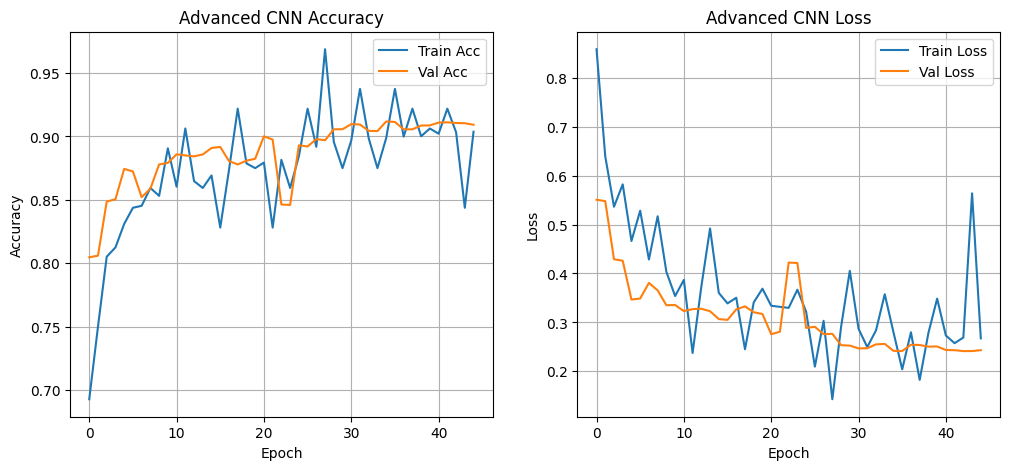

In [10]:
# Compare all models (including history from Phase 1 if available in memory)
# Note: Ensure 'histories' dictionary exists or recreate it conceptually
# For standalone run, we plot just the advanced model here

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_advanced.history['accuracy'], label='Train Acc')
plt.plot(history_advanced.history['val_accuracy'], label='Val Acc')
plt.title('Advanced CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_advanced.history['loss'], label='Train Loss')
plt.plot(history_advanced.history['val_loss'], label='Val Loss')
plt.title('Advanced CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()
